# Exploratory Data Analysis

Take a sample of the available images and verify we can manually detect malignant and benign images.

In [15]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Save the metadata file into a data frame

In [16]:
metadata_file = '../DATA/metadata.csv'
legend = pd.read_csv(metadata_file)

Get a sample of five images, display them, and print out their label according to the metadata legend.

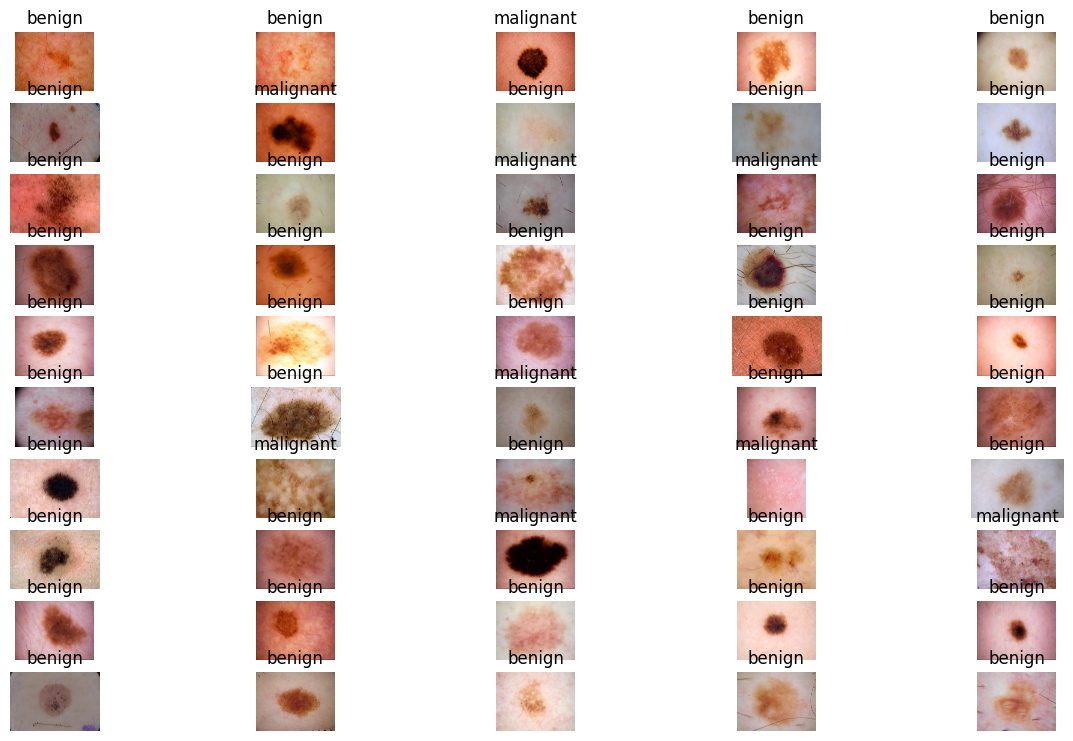

In [20]:
def display_sample_images(folder_path, num_images=50):
    num_benign = 0
    num_malignant = 0

    image_files = os.listdir(folder_path)
    
    # select a sample of images
    sample_images = random.sample(image_files, min(num_images, len(image_files)))
    
    # display those images
    fig = plt.figure(figsize=(15, 10))
    columns = 5
    rows = num_images // columns + 1
    for i, image_file in enumerate(sample_images):
        img = mpimg.imread(os.path.join(folder_path, image_file))
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.axis('off')

        # get the corresponding label from the legend
        truncated_file_name = image_file.split('.')[0]
        label = legend.loc[legend['isic_id'] == truncated_file_name, 'benign_malignant'].iloc[0]
        plt.title(label)
        if label == 'benign':
            num_benign += 1
        elif label == 'malignant':
            num_malignant += 1

    plt.show()
    return num_benign, num_malignant

num_images = 50
data_path = "../DATA/ISIC-images"
num_benign, num_malignant = display_sample_images(data_path, num_images)

In [21]:
print('BENIGN: ' + str(num_benign) + '/' + str(num_images))
print('MALIGNANT: ' + str(num_malignant) + '/' + str(num_images))

BENIGN: 41/50
MALIGNANT: 9/50


Looks like we have a distribution of images strongly favoring the prevelance of benign images. Of course this is just a sample and we will need to verify this with the full dataset.